<a href="https://colab.research.google.com/github/sovunia-hub/mathematical-modeling-of-applied-problems/blob/main/4_equations_with_a_known_spectrum_of_the_operator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import numpy as np

# np.random.seed = 123

# def findAF(N=0):
#   if N == 0:
#     dots = np.array([3+3j, 4-1j, 6+6j, 10+5j, 12+1j, 8-2j])
#   elif N == 2:
#     dots = np.array([3+3j, 4-1j])
#   else:
#     dots = np.random.uniform(3, 12, size=N) + 1j * np.random.uniform(-5, 6, size=N)
#   A = np.diagflat(dots)
#   f = np.arange(1, N + 1)
#   return A, f

In [ ]:
import numpy as np

In [ ]:
from itertools import combinations

def findParam(dots):
  error = 1e-8
  min_mu = None
  min_r = float('inf')

  for a, b in combinations(dots, 2):
    mu = (1j * np.imag(a * np.conj(b)) * (b - a)) / (2 * (np.abs(a * np.conj(b)) + np.real(a * np.conj(b)))) + (a + b) / 2
    #r = np.sqrt((np.abs(a - b)**2 * np.abs(np.conj(a) * b)) / (2 * np.abs(np.conj(a) * b) + np.real(np.conj(a) * b)))
    r = np.abs(mu - a)

    if all(np.abs(dots - mu) <= r + error) and r < min_r:
      (min_r, min_mu) = (r, mu)

  if min_mu is not None:
    return min_mu, min_r

  for a, b, c in combinations(dots, 3):
    mu = 1j * (np.abs(a)**2 * (b - c) + np.abs(b) ** 2 * (c - a) + np.abs(c)**2 * (a - b)) / (2 * np.imag(a * np.conj(b) + b * np.conj(c) + c * np.conj(a)))
    r = np.abs(mu - a)

    if all(np.abs(dots - mu) <= r + error) and r < min_r:
      (min_r, min_mu) = (r, mu)

  if min_mu is not None:
    return min_mu, min_r

  return None, None

In [ ]:
import matplotlib.pyplot as plt

def plotDots(dots, mu, r):
  if mu is None:
    print("Not found")
    return "Not found"
  plt.figure(figsize=(8, 8))
  circle = plt.Circle((mu.real, mu.imag), r, color='b', fill=False)
  plt.gca().add_patch(circle)
  plt.plot(mu.real, mu.imag, 'o', color='r')
  plt.scatter(np.real(dots), np.imag(dots))
  plt.grid()
  plt.xlabel("Real")
  plt.ylabel("Image")
  plt.show()

In [ ]:
def findU(N, eps=1e-5):
  A, f = findAF(N)
  dots = np.unique(np.linalg.eigvals(A))
  mu, r = findParam(dots)
  plotDots(dots, mu, r)
  u = np.zeros(N)
  f_norm = np.linalg.norm(f)
  kol = 0
  while True:
    kol += 1
    u_prev = u
    u = u_prev - (A @ u_prev - f) / mu
    if np.linalg.norm(u - u_prev) / f_norm < eps:
      return kol, np.linalg.norm(u - u_prev) / f_norm

In [ ]:
def findSimpleU(N, eps=1e-5):
  A, f = findAF(N)
  I = np.eye(N)
  u = np.zeros(N)
  B = I - A
  f_norm = np.linalg.norm(f)
  kol = 0
  while True:
    kol += 1
    u_prev = u
    u = B @ u + f
    if np.linalg.norm(u - u_prev) / f_norm < eps:
      return kol, np.linalg.norm(u - u_prev) / f_norm

In [ ]:
def findAF(N):
  a = 0
  b = 1
  h = np.abs(b - a) / N
  x = np.arange(N) * h + h / 2 + a
  A = np.zeros((N, N))
  for i in range(N):
    for j in range(N):
      if i == j:
        A[i, j] = h * x[i] * x[j] + 1
      else:
        A[i, j] = h * x[i] * x[j]
  return A, x

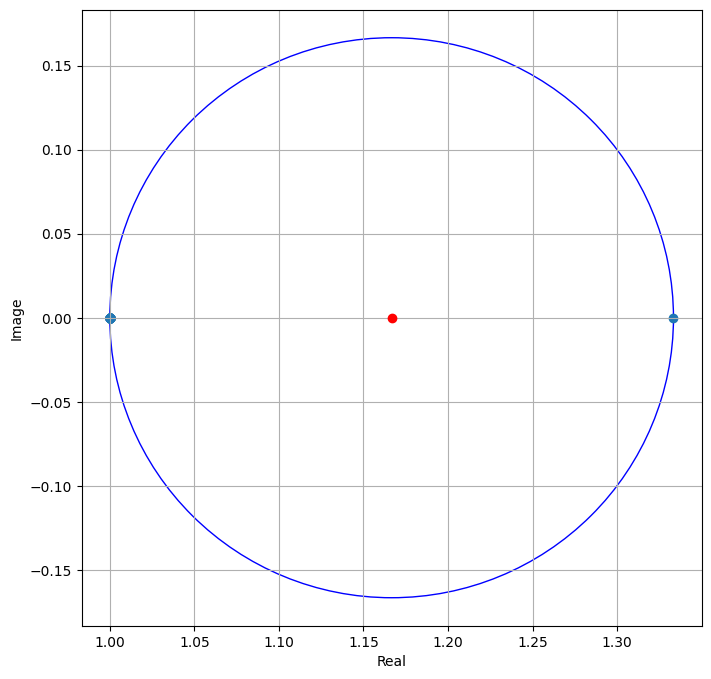

7 7.285584966412215e-06
CPU times: user 1.94 s, sys: 321 ms, total: 2.27 s
Wall time: 2.2 s
12 5.645013745664925e-06
CPU times: user 610 ms, sys: 106 ms, total: 716 ms
Wall time: 592 ms


In [ ]:
N = 1000
%time print(*findU(N))
%time print(*findSimpleU(N))

(4.632380757938121+1.2830951894845302j) 2.3690565774708285


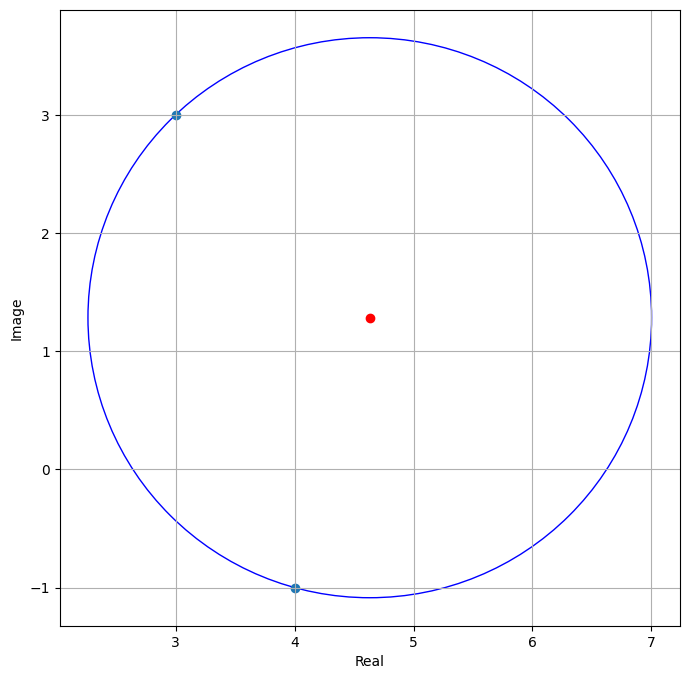

In [ ]:
a, b = 3+3j, 4-1j

mu = (1j * np.imag(a * np.conj(b)) * (b - a)) / (2 * (np.abs(a * np.conj(b)) + np.real(a * np.conj(b)))) + (a + b) / 2
#r = np.sqrt((np.abs(a - b)**2 * np.abs(np.conj(a) * b)) / (2 * np.abs(np.conj(a) * b) + np.real(np.conj(a) * b)))
r = np.abs(mu - a)

print(mu, r)

plotDots([a,b], mu, r)